# 📘 Análise de Campanhas com Comentários

In [1]:

# 🔼 1. Upload da planilha Excel
from google.colab import files
uploaded = files.upload()


Saving MR_OwnerTopic_Base_Teste.xlsx to MR_OwnerTopic_Base_Teste.xlsx


In [2]:

# 📥 2. Leitura da planilha e das abas
import pandas as pd

file_name = list(uploaded.keys())[0]
xls = pd.ExcelFile(file_name)

df_campanha = pd.read_excel(xls, "Campanha")
df_post = pd.read_excel(xls, "Post")

print("✅ Dados carregados com sucesso!")
print(f"▶ Campanha: {df_campanha.shape[0]} linhas")
print(f"▶ Post: {df_post.shape[0]} linhas")


✅ Dados carregados com sucesso!
▶ Campanha: 1 linhas
▶ Post: 57 linhas


In [3]:

# 👀 3. Visualização inicial dos dados
display(df_campanha.head())
display(df_post.head())


,Title,Aim,OverView,Inicio Campanha,Fim Campanha,PostCount,PostUserCount,ClapCount,ClapUserCount
0,"""Tabeya's Tatarabuki"" has been revived for the...",A partir da apresentação de um case de turismo...,O post apresenta fotos e vídeos relacionados a...,2023-10-01 15:18:00,2023-11-30 23:59:59,57,43,893,66


,Sexo,Idade,Likes,Apelido,Comentário
0,Female,70,10,Sacrifice,Even if you watch the Tabe family's tan -blowi...
1,Female,80,17,wild rabbit,The resurrection for the first time in 100 yea...
2,Female,50,6,Chinachi,It's a powerful and ultimate iron -making trad...
3,Female,80,4,wild rabbit,"Just the other day, you broadcast a special fe..."
4,Female,60,18,Anchu,"It is a time when it takes time and effort, an..."


In [4]:

# 💬 4. Análise de comentários e sentimentos
!pip install -q transformers
from transformers import pipeline

# Cria pipeline de sentimento
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")

# Aplica análise nos primeiros 100 comentários (por performance)
comentarios = df_post["Comentário"].dropna().astype(str).tolist()[:100]
sentimentos = sentiment_analyzer(comentarios)

# Cria DataFrame com resultados
import pandas as pd
df_sentimento = pd.DataFrame(sentimentos)
df_sentimento["Comentário"] = comentarios

# Exibe resultados
df_sentimento.head(10)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


,label,score,Comentário
0,POSITIVE,0.999342,Even if you watch the Tabe family's tan -blowi...
1,POSITIVE,0.999410,The resurrection for the first time in 100 yea...
2,POSITIVE,0.997577,It's a powerful and ultimate iron -making trad...
3,NEGATIVE,0.989881,"Just the other day, you broadcast a special fe..."
4,POSITIVE,0.990838,"It is a time when it takes time and effort, an..."
5,POSITIVE,0.999694,"A lively photo.\nI want to go to the spring ""T..."
6,POSITIVE,0.999599,I first learned about the word Watetsu.\nI wan...
7,POSITIVE,0.999448,I don't know in detail\nI want you to tell me ...
8,POSITIVE,0.999853,You are protecting the Taro Steel Tradition of...
9,POSITIVE,0.999494,I want to know more about the charm of the blo...


<ipython-input-10-9c8e4e69fbd6>:44: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-9c8e4e69fbd6>:44: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


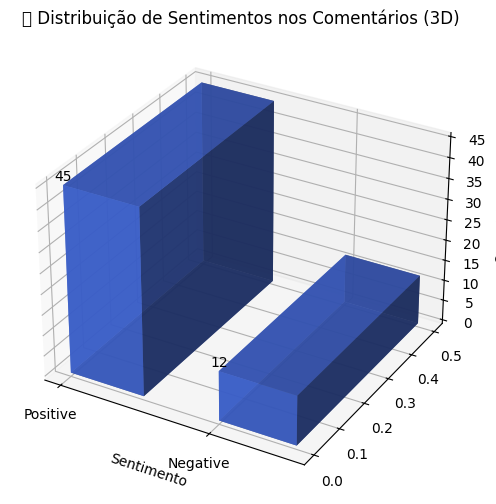

In [ ]:
# 5. Bloco complementar: Gráfico de barras da distribuição de sentimentos

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


# Converte para DataFrame a coluna de sentimentos
df_post["Sentimento"] = [s["label"].capitalize() for s in sentimentos]

# Conta quantos comentários para cada sentimento
sent_counts = df_post["Sentimento"].value_counts().reset_index()
sent_counts.columns = ["Sentimento", "Quantidade"]

# Gráfico
# Coordenadas
x = np.arange(len(sent_counts))
y = np.zeros_like(x)
z = np.zeros_like(x)
dx = np.ones_like(x) * 0.5
dy = np.ones_like(x) * 0.5
dz = sent_counts["Quantidade"].values

# Criação da figura
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Barras 3D
bars = ax.bar3d(x, y, z, dx, dy, dz, color='royalblue', alpha=0.8)

# Rótulos e layout
ax.set_xticks(x)
ax.set_xticklabels(sent_counts["Sentimento"])
ax.set_xlabel('Sentimento')
ax.set_ylabel('')
ax.set_zlabel('Quantidade')
ax.set_title('📊 Distribuição de Sentimentos nos Comentários (3D)')

# Adiciona rótulo com valor no topo de cada barra
for i in range(len(dz)):
    ax.text(x[i], y[i], dz[i] + 0.5, str(dz[i]), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# 6. Geração de síntese dos comentários em inglês com transformers
!pip install -q transformers sentencepiece
from transformers import pipeline

# Carrega o modelo de sumarização
resumidor = pipeline("summarization", model="facebook/bart-large-cnn")

# Junta os comentários em um único texto
comentarios = df_post["Comentário"].dropna().astype(str).tolist()
texto_unico = " ".join(comentarios)

# Divide o texto em blocos menores (~500 caracteres por bloco)
blocos = []
tamanho_bloco = 500
for i in range(0, len(texto_unico), tamanho_bloco):
    blocos.append(texto_unico[i:i + tamanho_bloco])

# Gera resumos parciais
resumos_parciais = []
for i, bloco in enumerate(blocos):
    try:
        resumo = resumidor(bloco, max_length=100, min_length=30, do_sample=False)[0]['summary_text']
        resumos_parciais.append(resumo)
    except Exception as e:
        print(f"Erro ao resumir bloco {i}: {e}")

# Junta os resumos parciais e gera uma síntese final
texto_resumo_parcial = " ".join(resumos_parciais)
sintese_final = resumidor(texto_resumo_parcial, max_length=130, min_length=30, do_sample=False)[0]['summary_text']

# Exibe o resultado em HTML com quebra de linha
from IPython.display import display, HTML

display(HTML(f"""
<div style='background-color:#f9f9f9; border:1px solid #ccc; padding:20px; border-radius:5px; font-family:Arial; line-height:1.6; max-width:1000px;'>
<strong>📘 Insight baseado nos comentários:</strong><br><br>
{sintese_final}
</div>
"""))


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Your max_length is set to 100, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


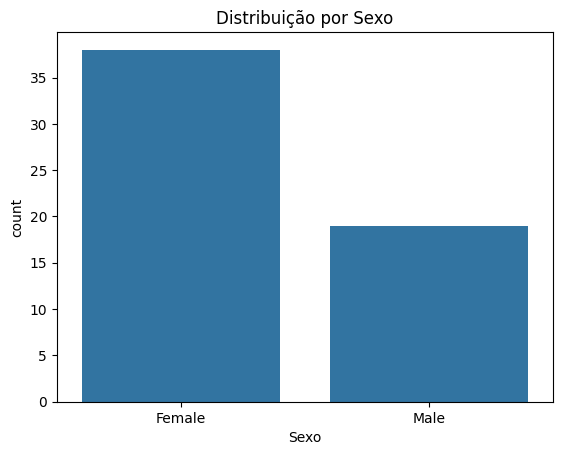

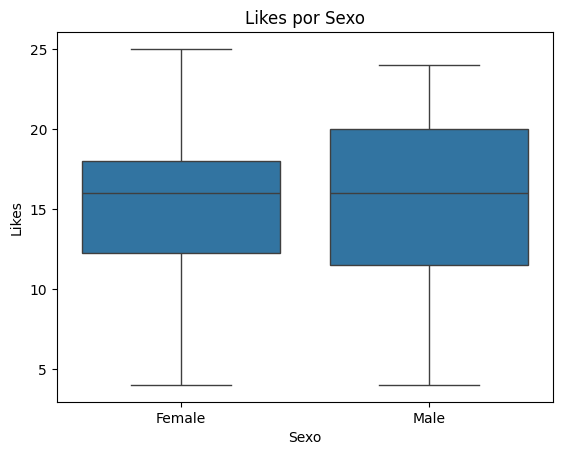

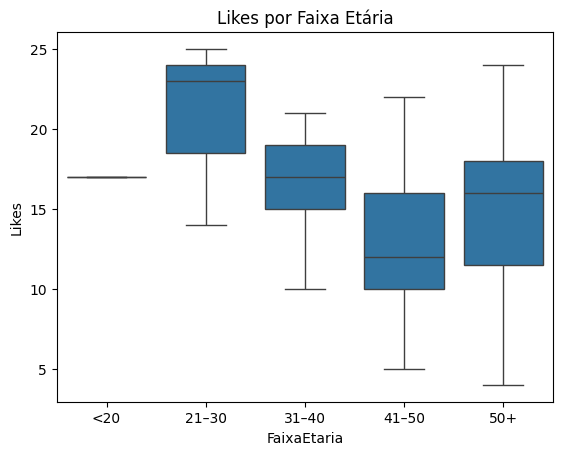

In [ ]:
# 📊 7. Gráficos por Sexo, Idade, Likes
import seaborn as sns
import matplotlib.pyplot as plt

# Distribuição de sexo
sns.countplot(data=df_post, x="Sexo")
plt.title("Distribuição por Sexo")
plt.show()

# Likes por sexo
sns.boxplot(data=df_post, x="Sexo", y="Likes")
plt.title("Likes por Sexo")
plt.show()

# Likes por faixa etária (binned)
df_post["FaixaEtaria"] = pd.cut(df_post["Idade"], bins=[0, 20, 30, 40, 50, 100], labels=["<20", "21–30", "31–40", "41–50", "50+"])
sns.boxplot(data=df_post, x="FaixaEtaria", y="Likes")
plt.title("Likes por Faixa Etária")
plt.show()


In [2]:
import os
import ipywidgets as widgets
from IPython.display import display, clear_output

def export_to_pdf(btn):
    clear_output()
    print("📝 Gerando PDF...")
    os.system("jupyter nbconvert --to pdf analise_campanha_comentarios.ipynb")
    print("✅ PDF gerado com sucesso!")

button = widgets.Button(description="📄 Gerar PDF da análise")
button.on_click(export_to_pdf)
display(button)


Button(description='📄 Gerar PDF da análise', style=ButtonStyle())